In [2]:
import model,utils
import local_datasets
from simulator.simulator import GaussianSimulator
from simulator.utils import load_params
from simulator.init import init_probabilistically

import torch
from torch.utils.data import DataLoader 

from matplotlib import pyplot as plt

In [3]:
trainset = local_datasets.Character_Dataset(device='cpu', directory='./datasets/Characters',invert=False)
trainloader = DataLoader(trainset,batch_size=int(1),shuffle=True)

In [3]:
encoder = model.E2E_Encoder(in_channels=1, binary_stimulation=True).to('cpu')

params = load_params('simulator/config/params.yaml')
r, phi = init_probabilistically(params,n_phosphenes=1024)
realistic_simulator = model.E2E_RealisticPhospheneSimulator(params, r, phi)#.to(cfg.device)

displaying 20 degrees of vision in a resolution of [256, 256]
one degree is 12.8 pixels
0 phosphenes are outside of view, will not be shown


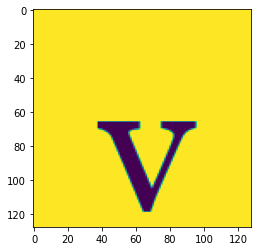

In [4]:
image, label = next(iter(trainloader))

plt.imshow(image[0][0])

In [9]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    x = torch.arange(h)
    Y, X = torch.meshgrid(x,x)
    dist_from_center = torch.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask



/home/maureen/anaconda3/envs/thesis_env/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


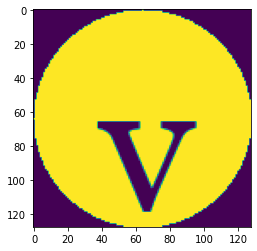

In [10]:
mask = create_circular_mask(image[0][0].shape[0],image[0][0].shape[1])
plt.imshow(image[0][0]*mask)

In [5]:
stim = encoder(image)
proxy = 1e-6*torch.ones_like(stim,device='cpu')
img = realistic_simulator(proxy).cpu().numpy()

62 out of 1 cross threshold
charge per second::
        size:   torch.Size([1, 1024])
        min:    5.10E-08
        max:    5.10E-08
        mean:   5.10E-08
        std:    3.55E-15
sigma (in pixels):
        size:   torch.Size([1, 1024])
        min:    2.14E-02
        max:    3.06E-01
        mean:   1.12E-01
        std:    7.99E-02
activation:
        size:   torch.Size([1, 1024])
        min:    5.10E-08
        max:    5.10E-08
        mean:   5.10E-08
        std:    3.55E-15
sigmoided activation:
        size:   torch.Size([1, 1024])
        min:    0.00E+00
        max:    4.08E-03
        mean:   2.47E-04
        std:    9.73E-04


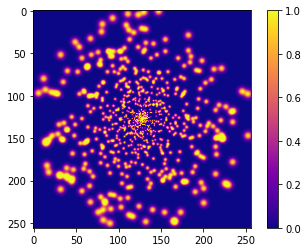

In [18]:
plt.imshow(img[0][0],cmap='plasma')
plt.colorbar()